### EDA for Medical Costs

### 1) Import Necesssary Libraries

In [193]:
# Import important library

import pandas as pd
import numpy as np

import matplotlib.pyplot as mplot
import seaborn as sns

from sklearn import model_selection
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### 2) Read the data as dataframe

In [194]:
medical_costs = pd.read_csv('insurance.csv')

medical_costs.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 3. Perform basic EDA which should include the following and print out your insights at every step.
##### a. Shape of the data
##### b. Data type of each attribute
##### c. Checking the presence of missing values
##### d. 5 point summary of numerical attributes
##### e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.
##### f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns
##### g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns
##### h. Distribution of categorical columns (include children)
##### i. Pair plot that includes all the columns of the data frame

In [195]:
medical_costs.shape

(1338, 7)

In [196]:
medical_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [197]:
### NULL Check across all columns
print("The total NA values in columns is " , sum([True for idx,row in medical_costs.iterrows() if any(row.isna())]))

print("Individual column wise NA values ")
print(medical_costs.isna().sum())

The total NA values in columns is  0
Individual column wise NA values 
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [198]:
print("Summary Statistics across all quantitative elements to understand the dataset's basic charactertistics (Mean , median etc )")
medical_costs.describe().transpose()

Summary Statistics across all quantitative elements to understand the dataset's basic charactertistics (Mean , median etc )


,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


Observation - Age is NOT distributed normally


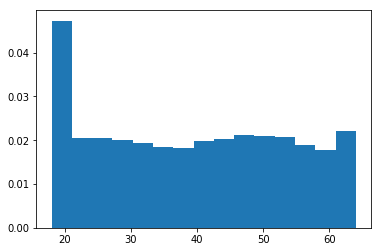

Observation - BMI is normally distributed


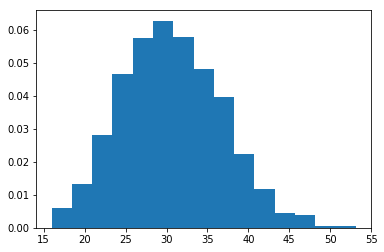

Observation - Charges are NOT normally distributed


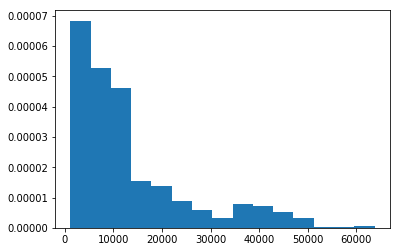

In [199]:
print("Observation - Age is NOT distributed normally")
mplot.hist(medical_costs["age"], bins=15 , density = True)
mplot.show()

print("Observation - BMI is normally distributed")
mplot.hist(medical_costs["bmi"], bins=15 , density = True)
mplot.show()

print("Observation - Charges are NOT normally distributed")
mplot.hist(medical_costs["charges"], bins=15 , density = True)
mplot.show()


(17.953, 21.833]    0.144993
(21.833, 25.667]    0.083707
(25.667, 29.5]      0.082960
(29.5, 33.333]      0.079223
(33.333, 37.167]    0.075486
(37.167, 41.0]      0.077728
(41.0, 44.833]      0.060538
(44.833, 48.667]    0.086697
(48.667, 52.5]      0.085949
(52.5, 56.333]      0.080717
(56.333, 60.167]    0.073991
(60.167, 64.0]      0.068012
Name: age, dtype: float64


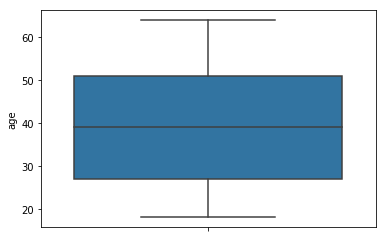

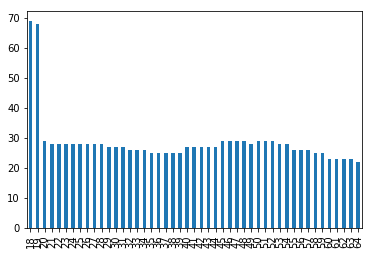

 Observation - The First quartile is 27 and a lot of members fall between that and the minimum value 18. 
 Observation - The Third quartile is 52 and a lot of members fall between that and the maximum value 64. 
 Observation - Age distribution using value_counts lists 25% of values fall in the <first quartile and approx 17% of values fall in the > third quartile


In [201]:
# Checking the presence of outliers in ‘age’ columns

print(medical_costs['age'].value_counts(normalize = True, bins = 12).sort_index())

sns.boxplot(y="age" , data = medical_costs)
mplot.show()

medical_costs['age'].value_counts().sort_index().plot.bar()
mplot.show()

print(" Observation - The First quartile is 27 and a lot of members fall between that and the minimum value 18. ")
print(" Observation - The Third quartile is 52 and a lot of members fall between that and the maximum value 64. ")
print(" Observation - Age distribution using value_counts lists 25% of values fall in the <first quartile and approx 17% of values fall in the > third quartile")



(15.922, 19.058]    0.018685
(19.058, 22.155]    0.058296
(22.155, 25.252]    0.117339
(25.252, 28.35]     0.180867
(28.35, 31.448]     0.192078
(31.448, 34.545]    0.178625
(34.545, 37.642]    0.127803
(37.642, 40.74]     0.073244
(40.74, 43.838]     0.031390
(43.838, 46.935]    0.014948
(46.935, 50.033]    0.004484
(50.033, 53.13]     0.002242
Name: bmi, dtype: float64


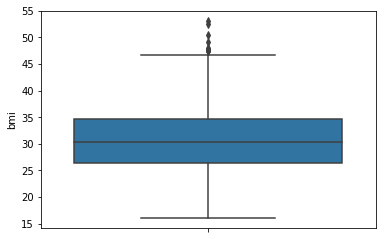

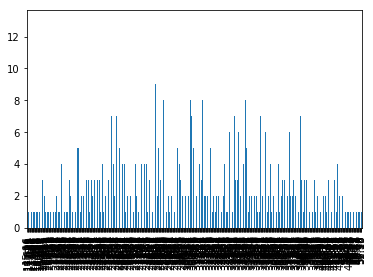

 Observation - The First quartile is 26 and a lot of members fall between that and the minimum value 15. 
 Observation - The Third quartile is 34 and a lot of members fall between that and the maximum value 53. 
 Observation - Age distribution using value_counts lists 18%(approx) of values fall in the <first quartile and 23%(approx) of values fall in the > third quartile


In [202]:
# Checking the presence of outliers in ‘bmi’ columns

print(medical_costs['bmi'].value_counts(normalize = True, bins = 12).sort_index())

sns.boxplot(y="bmi" , data = medical_costs)
mplot.show()

medical_costs['bmi'].value_counts().sort_index().plot.bar()
mplot.show()

print(" Observation - The First quartile is 26 and a lot of members fall between that and the minimum value 15. ")
print(" Observation - The Third quartile is 34 and a lot of members fall between that and the maximum value 53. ")
print(" Observation - Age distribution using value_counts lists 18%(approx) of values fall in the <first quartile and 23%(approx) of values fall in the > third quartile")

(1059.224, 4807.083]      0.256353
(4807.083, 8492.292]      0.195815
(8492.292, 12177.501]     0.187593
(12177.501, 15862.71]     0.101644
(15862.71, 19547.919]     0.049327
(19547.919, 23233.128]    0.039611
(23233.128, 26918.337]    0.030643
(26918.337, 30603.546]    0.021674
(30603.546, 34288.755]    0.011211
(34288.755, 37973.965]    0.029148
(37973.965, 41659.174]    0.026906
(41659.174, 45344.383]    0.022422
(45344.383, 49029.592]    0.021674
(49029.592, 52714.801]    0.002242
(52714.801, 56400.01]     0.000747
(56400.01, 60085.219]     0.001495
(60085.219, 63770.428]    0.001495
Name: charges, dtype: float64


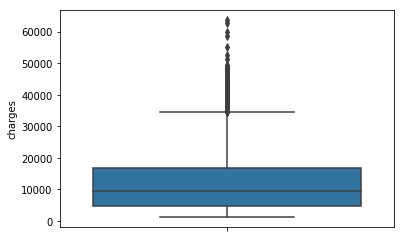

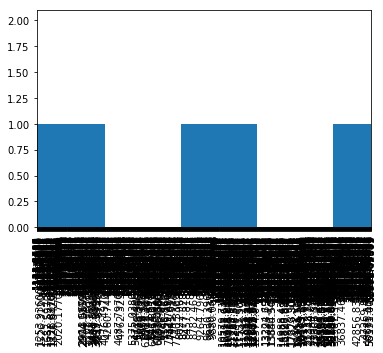

 Observation - The First quartile is 4740 and a lot of members fall between that and the minimum value 1121. 
 Observation - The Third quartile is 16639 and a lot of members fall between that and the maximum value 63770. 
 Observation - Age distribution using value_counts lists 25%(approx) of values fall in the <first quartile and 18%(approx) of values fall in the > third quartile


In [203]:
# Checking the presence of outliers in charges columns

print(medical_costs['charges'].value_counts(normalize = True, bins = 17).sort_index())

sns.boxplot(y="charges" , data = medical_costs)
mplot.show()

medical_costs['charges'].value_counts().sort_index().plot.bar()
mplot.show()

print(" Observation - The First quartile is 4740 and a lot of members fall between that and the minimum value 1121. ")
print(" Observation - The Third quartile is 16639 and a lot of members fall between that and the maximum value 63770. ")
print(" Observation - Age distribution using value_counts lists 25%(approx) of values fall in the <first quartile and 18%(approx) of values fall in the > third quartile")


In [204]:
#Encoding the categorical values

le = LabelEncoder()

medical_costs["sex"] = le.fit_transform(medical_costs["sex"])
medical_costs["smoker"] = le.fit_transform(medical_costs["smoker"])
medical_costs["region"] = le.fit_transform(medical_costs["region"])

medical_costs.head(5)

print(medical_costs["sex"].value_counts())
print(medical_costs["smoker"].value_counts())
print(medical_costs["region"].value_counts())
print(medical_costs["children"].value_counts())


1    676
0    662
Name: sex, dtype: int64
0    1064
1     274
Name: smoker, dtype: int64
2    364
3    325
1    325
0    324
Name: region, dtype: int64
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


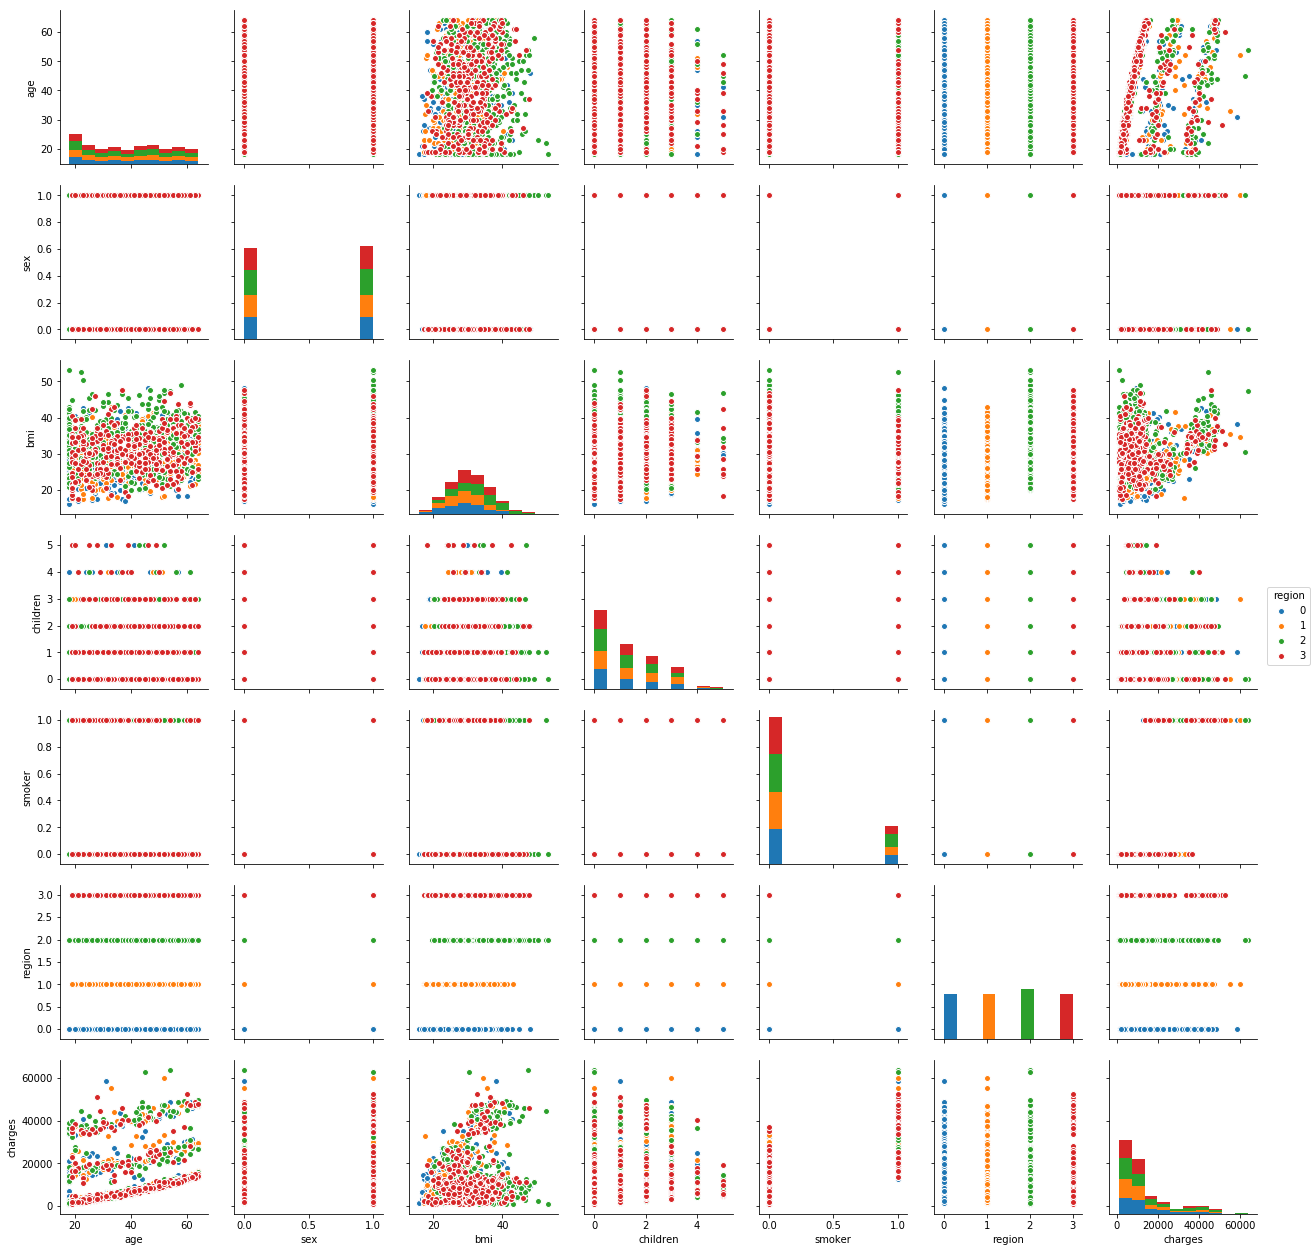

In [117]:
# Pair plot that includes all the columns of the dataframe
# This pairplot is done using REGION to differentiate the scatter.

sns.pairplot(medical_costs, kind="scatter", hue="region")  

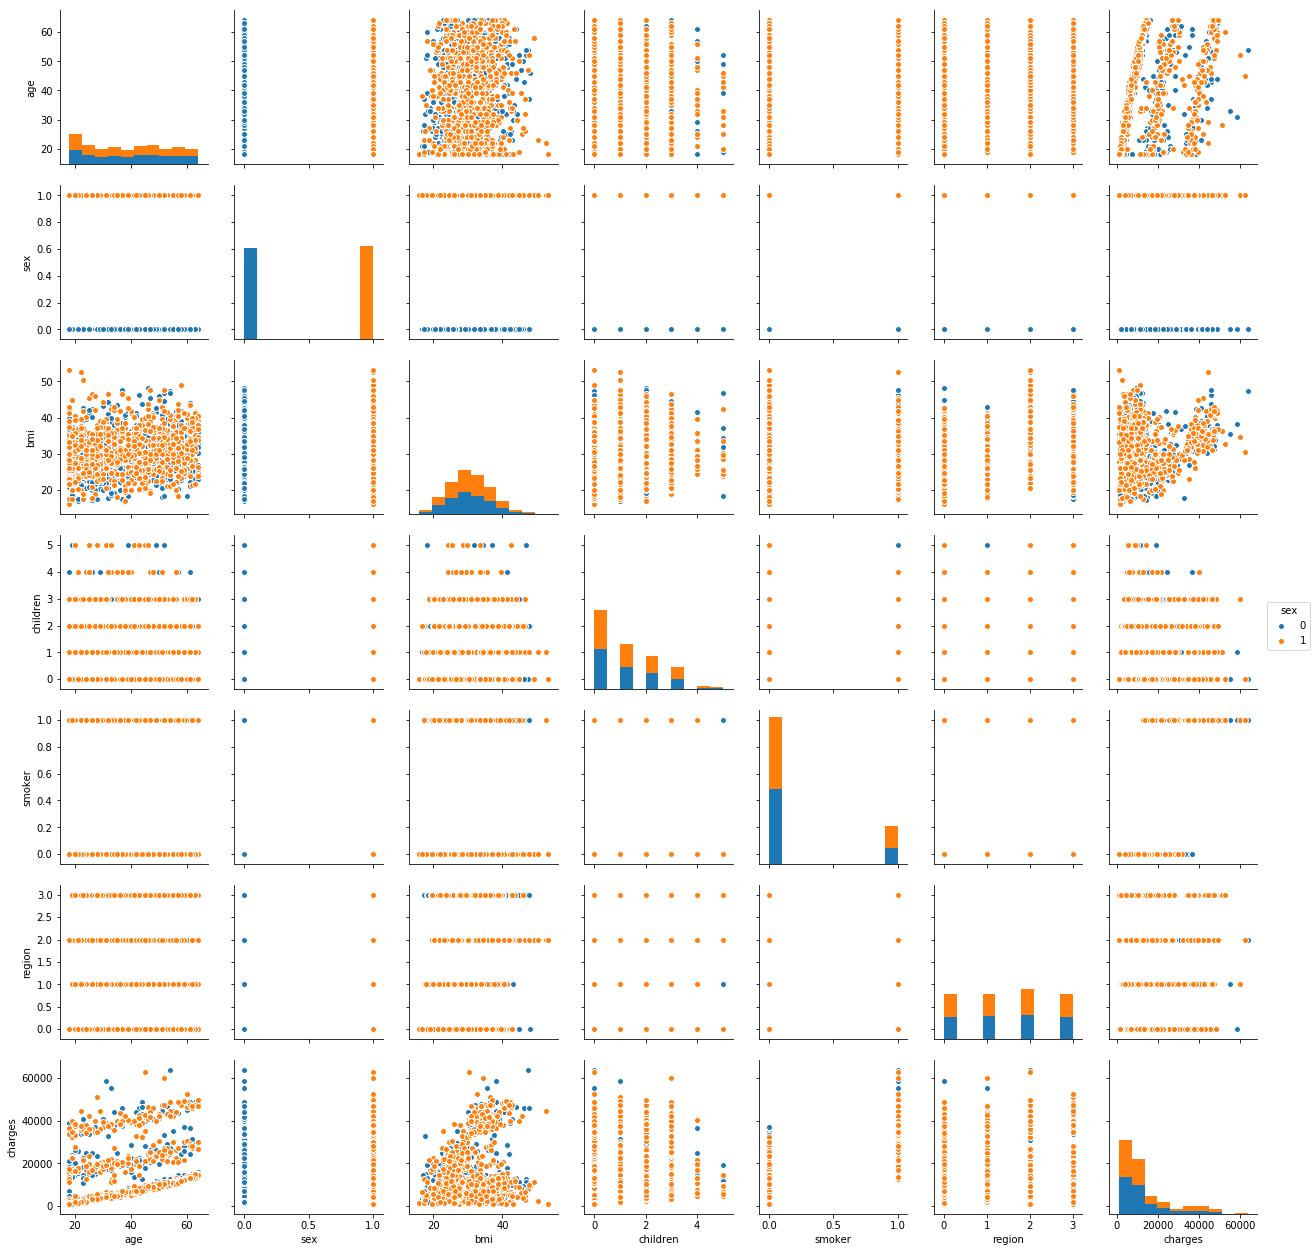

In [118]:
# Pair plot that includes all the columns of the dataframe
# This pairplot is done using SEX to differentiate the scatter.

sns.pairplot(medical_costs, kind="scatter", hue="sex") 

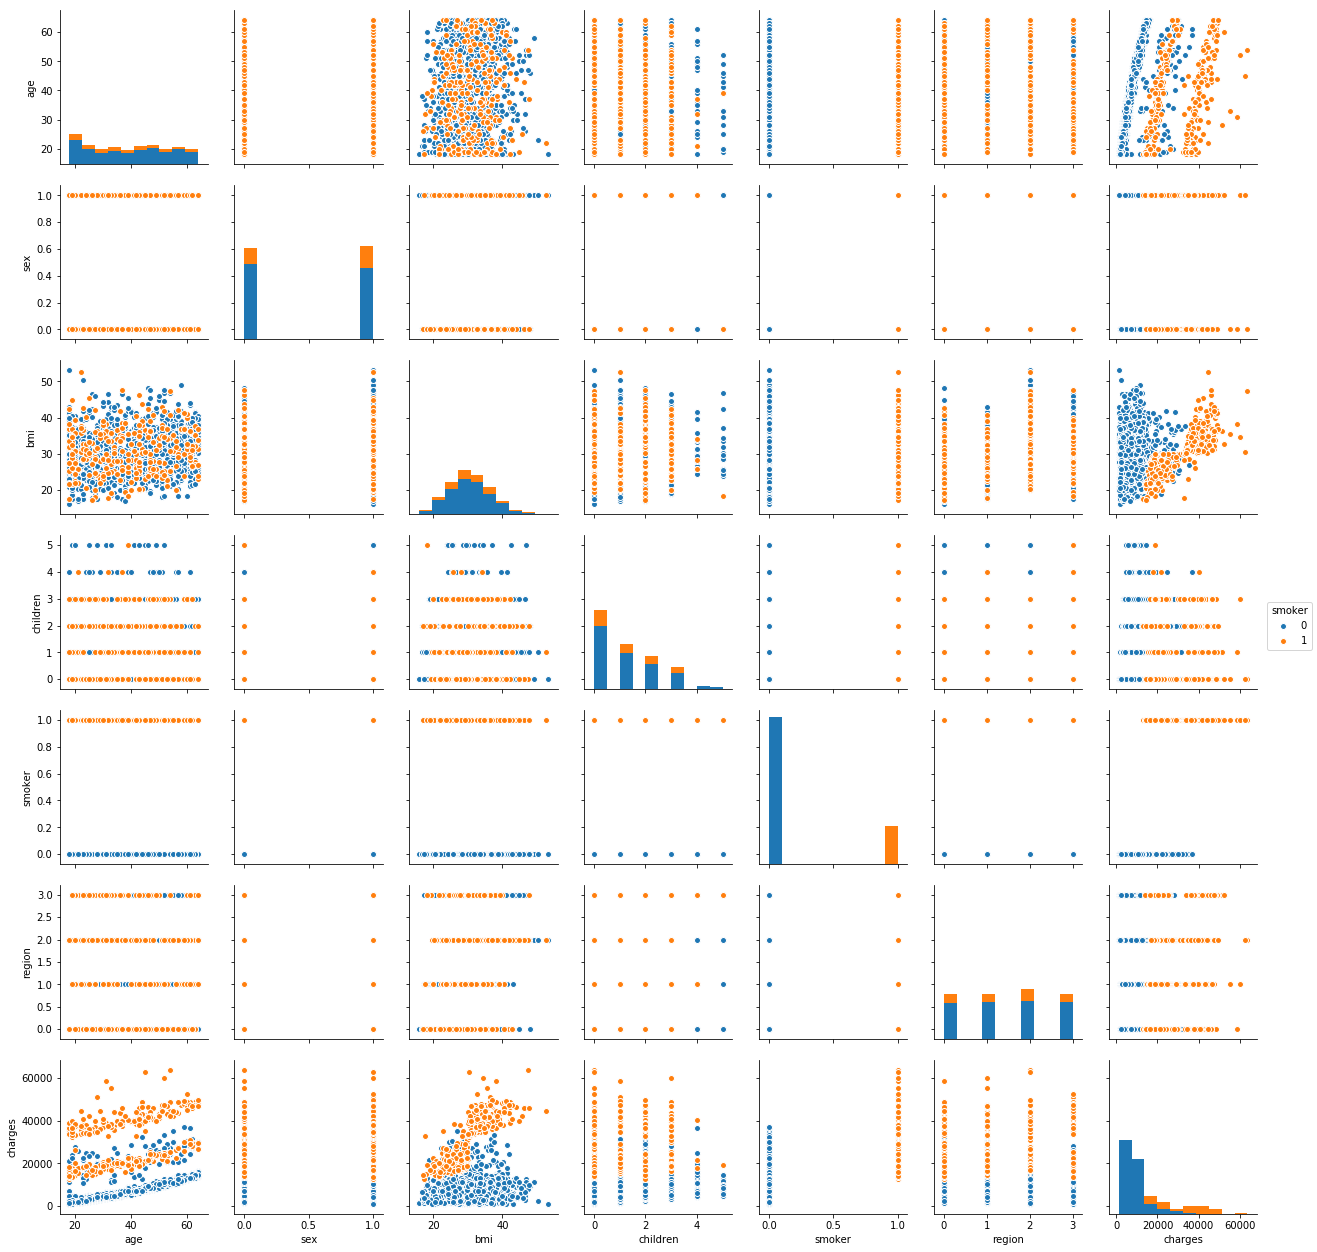

In [121]:
# Pair plot that includes all the columns of the dataframe
# This pairplot is done using SMOKER to differentiate the scatter.

sns.pairplot(medical_costs, kind="scatter", hue="smoker") 

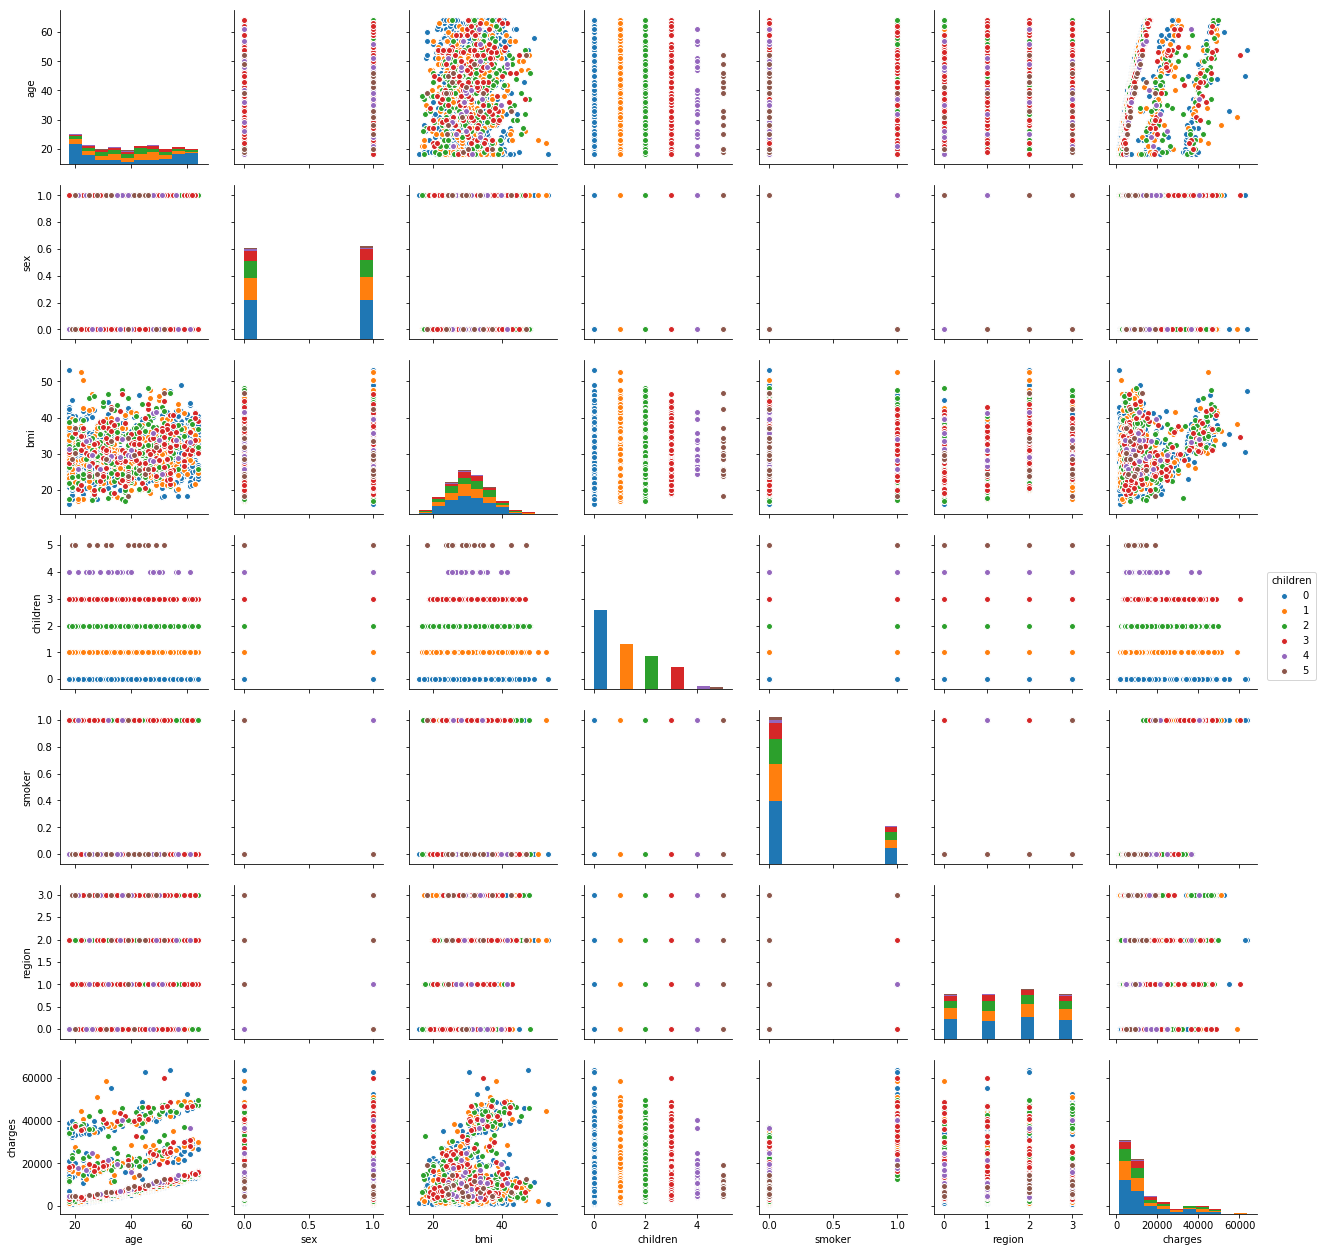

In [124]:
# Pair plot that includes all the columns of the dataframe
# This pairplot is done using CHILDREN to differentiate the scatter.

sns.pairplot(medical_costs, kind="scatter", hue="children") 

In [206]:
# Answer the following questions with statistical evidence 
# a. Do charges of people who smoke differ significantly from the people who don't?

print(medical_costs.groupby('smoker')['charges'].sum()) 

#mplot.bar(medical_costs["smoker"],medical_costs["charges"].sum())
#mplot.show()

print("Assessment - NO. The charges are ONLY marginally higher for non-smokers.")

smoker
0    8.974061e+06
1    8.781764e+06
Name: charges, dtype: float64
Assessment - NO. The charges are ONLY marginally higher for non-smokers.


In [207]:
# Answer the following questions with statistical evidence 
# b. Does bmi of males differ significantly from that of females?

print(medical_costs.groupby('sex')['bmi'].sum()) 

#mplot.bar(medical_costs["sex"],medical_costs["bmi"].sum())
#mplot.show()

print("Assessment - NO. The BMI are only marginally higher for 1 (males).")


sex
0    20110.070
1    20917.555
Name: bmi, dtype: float64
Assessment - NO. The BMI are only marginally higher for 1 (males).


In [208]:
# Answer the following questions with statistical evidence 
# c. Is the proportion of smokers significantly different in different genders?

print(medical_costs.groupby('sex')['smoker'].count()) 

#mplot.bar(medical_costs["sex"],medical_costs["smoker"].count())
#mplot.show()

print("Assessment - NO. The smokers are only marginally higher for 1 (males).")


sex
0    662
1    676
Name: smoker, dtype: int64
Assessment - NO. The smokers are only marginally higher for 1 (males).


In [213]:
# Answer the following questions with statistical evidence 
# d. Is the distribution of bmi across women with no children, one child and two children, the same ?

medical_cost_grouped = medical_costs.groupby(['sex','children'])['bmi'].sum()
print(medical_cost_grouped)

print("Assessment - NO. The BMI are NOT same for women across no children, one child and two children.")

#mplot.bar(medical_cost_grouped["children"],medical_cost_grouped["bmi"].count())
#mplot.show()


sex  children
0    0           8774.480
     1           4748.320
     2           3647.325
     3           2343.605
     4            351.375
     5            244.965
1    0           8761.390
     1           5173.580
     2           3787.420
     3           2473.835
     4            433.405
     5            287.925
Name: bmi, dtype: float64
Assessment - NO. The BMI are NOT same for women across no children, one child and two children.
